In [3]:
from paper_plot import load_model_results,load_baseline_csv, merge_results
import matplotlib.pyplot as plt
import json

def results_plot_2(datasets, dataset_order):
    """
    Plot compression & decompression speed vs compression ratio:
    - X-axis: Compression Ratio
    - Y-axis: KB/s (log scale)
    - Color: Compressor model
    """
    # Manual color map for compressors
    color_map = {
        "zip": "gray",
        "gzip": "dimgray",
        "zstd -3": "lightgray",
        "zstd -1": "silver",
        "zstd -19": "darkgray",
        "distilgpt2": "silver",
        "openai-community/gpt2": "lightblue",
        "xz -9e (LZMA2)": "gainsboro",
        "Qwen/Qwen2.5-0.5B": "tab:blue",
        "Qwen/Qwen2.5-1.5B": "tab:orange",
        "Qwen/Qwen2.5-7B": "tab:green",
        "Qwen/Qwen3-0.6B": "tab:purple",
        "Qwen/Qwen3-1.7B": "tab:brown",
        "Qwen/Qwen3-8B": "tab:pink",
        "meta-llama/Llama-3.2-1B": "tab:olive",
        "HuggingFaceTB/SmolLM-135M": "tab:red",
        "HuggingFaceTB/SmolLM2-135M": "tab:cyan"
    }

    symbol_map = {
        "zip": "o",
        "gzip": "o",
        "zstd -3": "o",
        "zstd -1": "o",
        "zstd -19": "o",
        "distilgpt2": "x",
        "openai-community/gpt2": "x",
        "xz -9e (LZMA2)": "o",
        "Qwen/Qwen2.5-0.5B": "*",
        "Qwen/Qwen2.5-1.5B": "*",
        "Qwen/Qwen2.5-7B": "*",
        "Qwen/Qwen2.5-14B": "*",
        "Qwen/Qwen3-0.6B": "s",
        "Qwen/Qwen3-1.7B": "s",
        "Qwen/Qwen3-8B": "s",
        "Qwen/Qwen3-14B": "s",
        "meta-llama/Llama-3.2-1B": "D",
        "HuggingFaceTB/SmolLM-135M": "h",
        "HuggingFaceTB/SmolLM2-135M": "h"
    }

    color_order = list(color_map.keys())

    # ===== Compression Speed Plot =====
    fig_c, axes_c = plt.subplots(1, len(dataset_order), figsize=(10, 6))
    if len(dataset_order) == 1:
        axes_c = [axes_c]

    for idx, dataset in enumerate(dataset_order):
        if dataset not in datasets:
            continue
        comp_dict = datasets[dataset]
        
        ax_c = axes_c[idx]
        ax_c.set_title(f"Compression Speed - {dataset}")

        gzip_compression_ratio = comp_dict.get("gzip", {}).get("original_size_bits", 0) / comp_dict.get("gzip", {}).get("compressed_size_bits", 0)

        for comp_name, m in comp_dict.items():
            orig_bits = m["original_size_bits"]
            comp_bits = m["compressed_size_bits"]
            # ratio_percent = (comp_bits / orig_bits) * 100 if orig_bits else 0
            ratio_percent = (orig_bits / comp_bits) / gzip_compression_ratio
            speed_KBps = (orig_bits / 8 / 1024) / m["compression_time"] if m["compression_time"] > 0 else 0
            color = color_map.get(comp_name, "tab:red")
            ax_c.scatter(ratio_percent, speed_KBps, color=color, label=comp_name, marker=symbol_map.get(comp_name, 'o'))

        ax_c.set_xlabel("Compression Ratio (Normalized to Gzip)")
        ax_c.set_ylabel("Compression Speed (KB/s)")
        ax_c.set_yscale("log")
        handles, labels = ax_c.get_legend_handles_labels()
        sorted_items = sorted(
            zip(labels, handles),
            key=lambda x: color_order.index(x[0]) if x[0] in color_order else len(color_order)
        )

        sorted_labels, sorted_handles = zip(*sorted_items)
        ax_c.legend(sorted_handles, sorted_labels)

    plt.tight_layout()
    plt.show()
    plt.savefig("compression_speed_plot.png")
    # plt.savefig(
    #     f"compression_speed_plot.pdf",
    #     format="pdf",
    #     bbox_inches="tight",
    #     pad_inches=0.01,
    #     dpi=300
    # )
    plt.close()

    # ===== Decompression Speed Plot =====
    fig_d, axes_d = plt.subplots(1, len(dataset_order), figsize=(10, 6))
    if len(dataset_order) == 1:
        axes_d = [axes_d]

    for idx, dataset in enumerate(dataset_order):
        if dataset not in datasets:
            continue
        comp_dict = datasets[dataset]

        ax_d = axes_d[idx]
        ax_d.set_title(f"Decompression Speed - {dataset}")

        gzip_compression_ratio = comp_dict.get("gzip", {}).get("original_size_bits", 0) / comp_dict.get("gzip", {}).get("compressed_size_bits", 0)

        for comp_name, m in comp_dict.items():
            orig_bits = m["original_size_bits"]
            comp_bits = m["compressed_size_bits"]
            # ratio_percent = (comp_bits / orig_bits) * 100 if orig_bits else 0
            ratio_percent = (orig_bits / comp_bits) / gzip_compression_ratio
            speed_KBps = (comp_bits / 8 / 1024) / m["decompression_time"] if m["decompression_time"] > 0 else 0
            color = color_map.get(comp_name, "tab:red")
            ax_d.scatter(ratio_percent, speed_KBps, color=color, label=comp_name, marker=symbol_map.get(comp_name, 'o'))

        ax_d.set_xlabel("Compression Ratio (Normalized to Gzip)")
        ax_d.set_ylabel("Decompression Speed (KB/s)")
        ax_d.set_yscale("log")
        handles, labels = ax_d.get_legend_handles_labels()
        sorted_items = sorted(
            zip(labels, handles),
            key=lambda x: color_order.index(x[0]) if x[0] in color_order else len(color_order)
        )

        sorted_labels, sorted_handles = zip(*sorted_items)
        ax_d.legend(sorted_handles, sorted_labels)

    plt.tight_layout()
    plt.show()
    plt.savefig("decompression_speed_plot.png")
    # plt.savefig(
    #     f"decompression_speed_plot.pdf",
    #     format="pdf",
    #     bbox_inches="tight",
    #     pad_inches=0.01,
    #     dpi=300
    # )
    plt.close()

    print("Plots saved as compression_speed_plot.png and decompression_speed_plot.png")

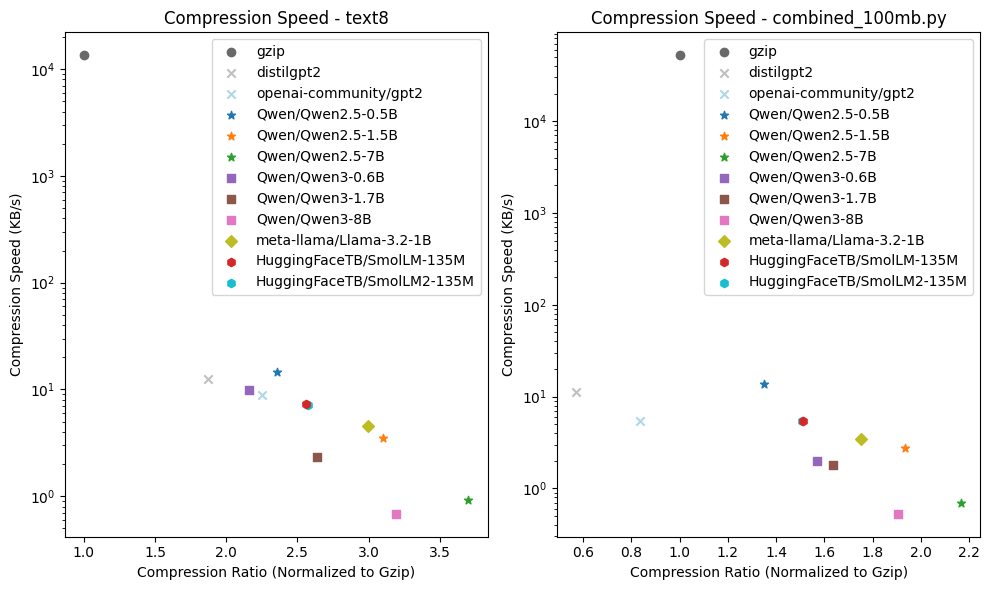

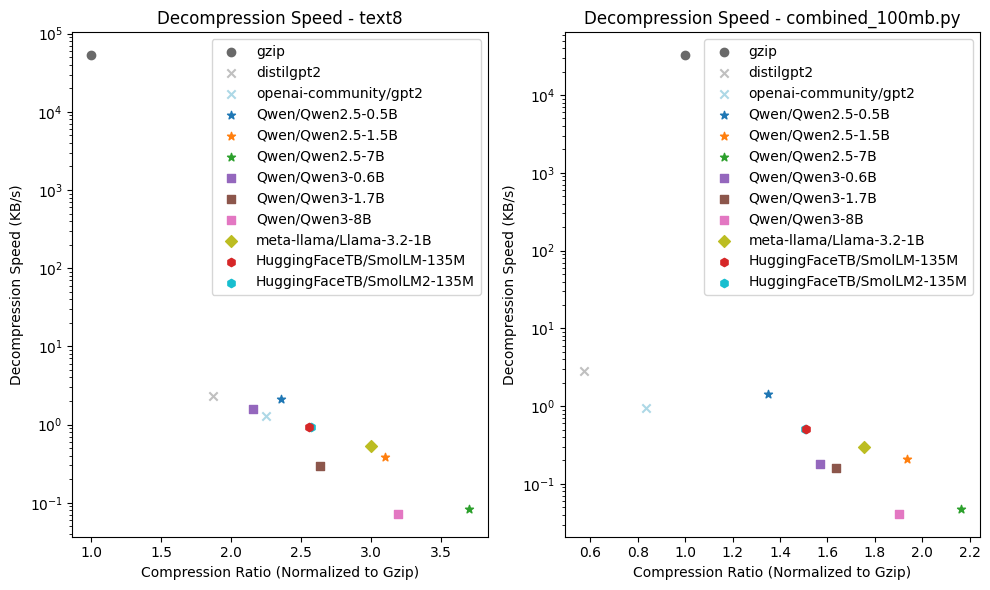

Plots saved as compression_speed_plot.png and decompression_speed_plot.png


In [6]:
dataset_order = ["text8", "combined_100mb.py"]

model_data = load_model_results(
    "compression_results_paper.json",
    selected_datasets=dataset_order,
    selected_n=[500000]
)

baseline_text8 = load_baseline_csv(
    "text8_baseline.csv",
    dataset_name="text8",
    selected_compressors=["gzip"]
)

pytorrent_data = load_baseline_csv(
    "pytorrent_baseline.csv",
    dataset_name="combined_100mb.py",
    selected_compressors=["gzip"]
)

# print("Loaded model data:", json.dumps(model_data, indent=2))

# Merge results (model + baselines)
final_data = merge_results(model_data, baseline_text8)
final_data = merge_results(final_data, pytorrent_data)

# Plot results
results_plot_2(final_data, dataset_order)